In [1]:
# do basic imports
import numpy as np
import pandas as pd

In [2]:
# load data
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb_data = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### View the dataframes loaded

## Genome scores and tags

In [11]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [24]:
# check length of tagId column
len(genome_scores['tagId'])

15584448

In [4]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [25]:
len(genome_tags)

1128

# IMDB data

In [5]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [27]:
len(imdb_data['movieId'])

27278

## Links and Movies

In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [28]:
len(links['movieId'])

62423

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
len(movies['movieId'])

62423

## Tags

In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [30]:
len(tags['movieId'])

1093360

# Train and test

In [9]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
len(train)

10000038

In [10]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [4]:
len(test)

5000019

## Merge train with movies

In [3]:
train_movies = pd.merge(train, movies, on='movieId')

### EDA on train_movies

In [16]:
# check the length of train_movies
len(train_movies)

10000038

In [5]:
# check for null values
train_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [17]:
# display last 5 rows of train_movies
train_movies.tail()

,userId,movieId,rating,timestamp,title,genres
10000033,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War
10000034,72315,190143,2.5,1567628158,Formentera Lady,(no genres listed)
10000035,131116,206347,3.0,1568558126,Nocturne (1946),Crime|Drama|Mystery
10000036,85757,196867,3.5,1563175258,Guys & Balls (2004),Comedy|Romance
10000037,72315,97148,3.0,1567584197,Elia Kazan: A Director's Journey (1995),Documentary


Now let's display the top rated movies.

In [6]:
# top 20 movies based on their ratings
train_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
Final Recourse (2013)                       5.0
Lady and the Tramp (2019)                   5.0
Virasat (1997)                              5.0
Committed (2014)                            5.0
Sole Proprietor (2016)                      5.0
The Doll (2017)                             5.0
Hempsters: Plant the Seed (2008)            5.0
Nero's Guests (2009)                        5.0
Nesting (2012)                              5.0
The Dragon Spell (2016)                     5.0
Solanin (2010)                              5.0
The Rizen (2017)                            5.0
Hepta: The Last Lecture (2016)              5.0
Her Composition (2015)                      5.0
Social Life of Small Urban Spaces (1988)    5.0
The Rival (2006)                            5.0
The Dreamed Ones (2016)                     5.0
Land and Shade (2015)                       5.0
Solitary (2016)                             5.0
Neither Wolf Nor Dog                        5.0
Name: rating, dtype: float64

However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

Let's now look at the total number of ratings for a movie:

In [7]:
# Top 20 movies that were rated the most
train_movies.groupby('title')['rating'].count().sort_values(ascending=False).head(20)

title
Shawshank Redemption, The (1994)                                                  32831
Forrest Gump (1994)                                                               32383
Pulp Fiction (1994)                                                               31697
Silence of the Lambs, The (1991)                                                  29444
Matrix, The (1999)                                                                29014
Star Wars: Episode IV - A New Hope (1977)                                         27560
Jurassic Park (1993)                                                              25518
Schindler's List (1993)                                                           24004
Braveheart (1995)                                                                 23722
Fight Club (1999)                                                                 23536
Terminator 2: Judgment Day (1991)                                                 23075
Toy Story (1995)          

Let's confirm our intuition by creating a dataframe which showing the average rating per movie along with the total number of ratings.

In [4]:
#create a dataframe for analysis
num_of_ratings = pd.DataFrame(train_movies.groupby('title')['rating'].mean().sort_values(ascending=False))
num_of_ratings['total number of ratings'] = pd.DataFrame(train_movies.groupby('title')['rating'].count()) 

In [6]:
num_of_ratings.head(20)

,rating,total number of ratings
title,,
Final Recourse (2013),5.0,1
Lady and the Tramp (2019),5.0,1
Virasat (1997),5.0,1
Committed (2014),5.0,1
Sole Proprietor (2016),5.0,1
The Doll (2017),5.0,1
Hempsters: Plant the Seed (2008),5.0,1
Nero's Guests (2009),5.0,1
Nesting (2012),5.0,1


From the above dataframe we can clearly see that the mean rating of movie is misleading since it can be rated only once.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('dark')
%matplotlib inline

Let's create a new dataframe also containing the `title`, `rating` and `total number of ratings`, but this time we will sort by the `total number of ratings`.

In [11]:
#create a dataframe for analysis
new_trend = pd.DataFrame(train_movies.groupby('title')['rating'].mean())
new_trend['total number of ratings'] = pd.DataFrame(train_movies.groupby('title')['rating'].count())

In [14]:
# sort dataframe by total number of ratings
new_trend.sort_values(by=['total number of ratings'], inplace=True, ascending=False)
# reset the index
new_trend.reset_index(inplace=True)

In [15]:
new_trend.head()

,index,title,rating,total number of ratings
0,34480,"Shawshank Redemption, The (1994)",4.417624,32831
1,14537,Forrest Gump (1994),4.047216,32383
2,31236,Pulp Fiction (1994),4.195097,31697
3,34840,"Silence of the Lambs, The (1991)",4.144172,29444
4,25144,"Matrix, The (1999)",4.154253,29014


Now, let's plot the top 10 most rated movies.

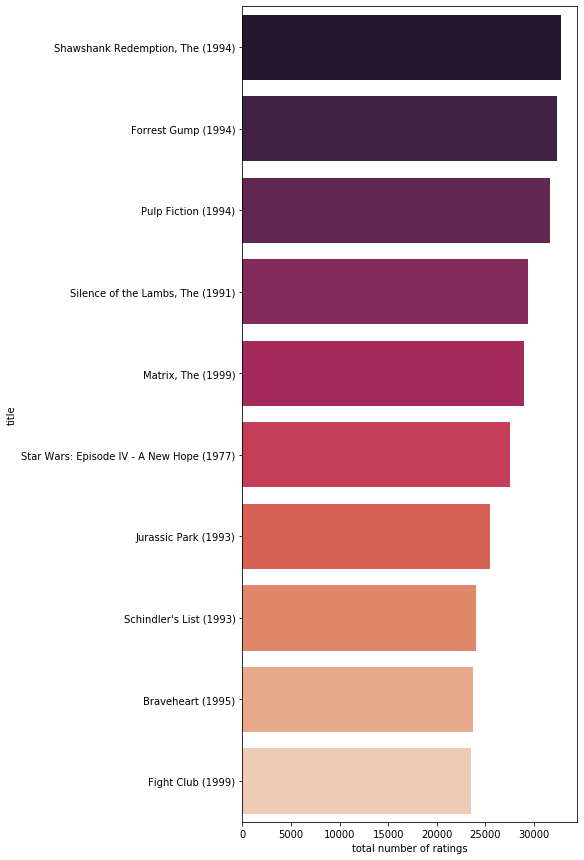

In [16]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.barplot(x="total number of ratings", y="title", data=new_trend.head(10), palette='rocket')

Next, let's see which ratings were mostly given.

Text(0.5, 1.0, 'Distribution of Ratings')

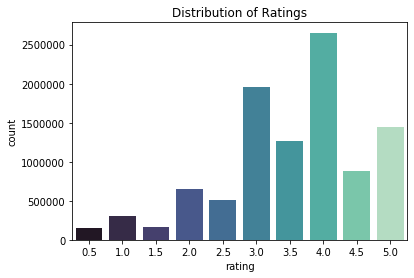

In [17]:
# plot distribution of ratings
sns.countplot(x = 'rating', data = train_movies, palette="mako")
plt.title("Distribution of Ratings")
#flare
#crest
#magma
#viridis
#rocket_r

From this graph we see that the most popular rating was 4.0

Let's try and visualize the number of ratings given by each user.

In [5]:
#create a dataframe for analysis
user_id = pd.DataFrame(train_movies.groupby('userId')['rating'].mean())
user_id['total number of ratings'] = pd.DataFrame(train_movies.groupby('userId')['rating'].count())

In [31]:
user_id.head()

,rating,total number of ratings
userId,,
1,3.910714,28
2,3.416667,72
3,3.691235,251
4,3.308989,89
5,3.885714,35


In [6]:
# sort dataframe by total number of ratings
user_id.sort_values(by=['total number of ratings'], inplace=True, ascending=False)
# reset the index
user_id.reset_index(inplace=True)

In [7]:
user_id.head(10)

,userId,rating,total number of ratings
0,72315,3.092380,12952
1,80974,3.277582,3680
2,137293,3.192168,3588
3,33844,2.583853,3208
4,20055,3.179016,3050
5,109731,2.830026,2671
6,49403,1.514045,2670
7,92046,3.484296,2579
8,110971,3.764642,2288
9,30879,2.854203,2284


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

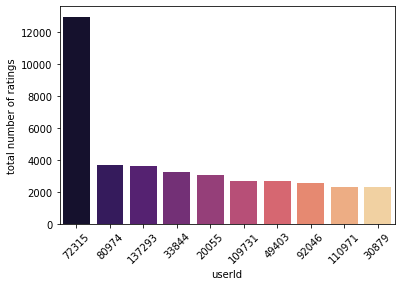

In [29]:
sns.barplot(y="total number of ratings", x="userId", data=user_id.head(10), 
            order = user_id.head(10).sort_values('total number of ratings', ascending=False).userId, palette='magma')
plt.xticks(rotation=45)

Can we determine which genres was rated the most?

We can, but first let's clean our genre column.

#### Preprocess genres in train_movies dataset

In [4]:
import re

In [5]:
def preprocess_genre(genre):
    #genre = genre.lower
    genre = re.sub(r'[\-]', '_', genre)
    genre = re.sub(r'[\(\)]', '', genre)
    genre = re.sub(r'no genres listed', 'no_genres_listed', genre)
    genre = ' '.join([word for word in genre.split('|')])
    return genre

In [6]:
train_movies['clean genres'] = train_movies['genres'].apply(preprocess_genre)

In [7]:
train_movies.tail()

,userId,movieId,rating,timestamp,title,genres,clean genres
10000033,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War,Action Drama War
10000034,72315,190143,2.5,1567628158,Formentera Lady,(no genres listed),no_genres_listed
10000035,131116,206347,3.0,1568558126,Nocturne (1946),Crime|Drama|Mystery,Crime Drama Mystery
10000036,85757,196867,3.5,1563175258,Guys & Balls (2004),Comedy|Romance,Comedy Romance
10000037,72315,97148,3.0,1567584197,Elia Kazan: A Director's Journey (1995),Documentary,Documentary


We'll use the `FreqDistVisualizer` imported from the yellowbrick library to determine the frequency distribution of the genres.

In [8]:
# import our visualizer
from yellowbrick.text import FreqDistVisualizer

In [9]:
# Apply countvectorizer to genres and get feature names

from sklearn.feature_extraction.text import CountVectorizer
genre_vect = CountVectorizer()
docs = genre_vect.fit_transform(train_movies['clean genres'])
genre_feat = genre_vect.get_feature_names()

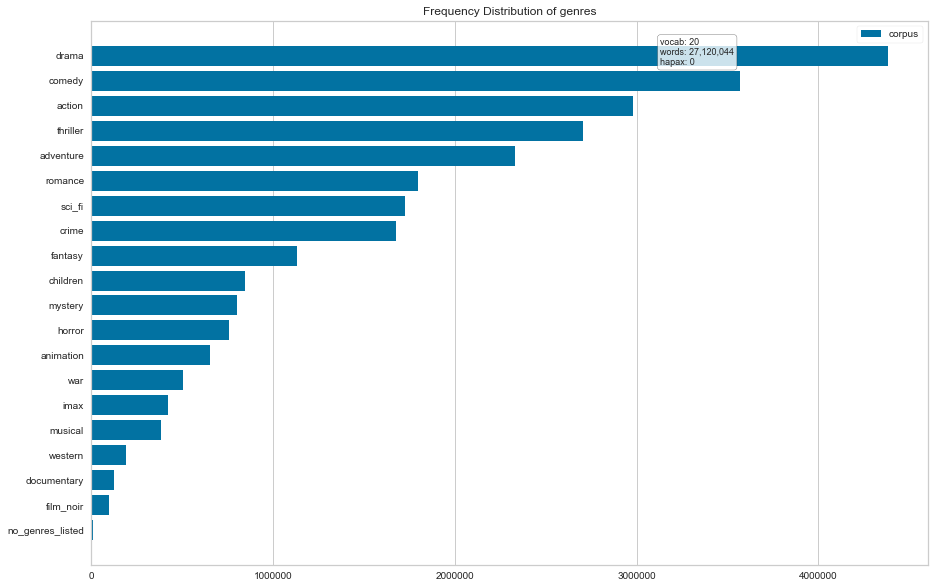

In [10]:
# Visualize the frequency distribution of genres

viz_genres = FreqDistVisualizer(features=genre_feat, orient='h', size=(1080,720), palette='rocket_r',
                            title = 'Frequency Distribution of genres', n=20)
viz_genres.fit(docs)
viz_genres.show()

In [13]:
train_movies_imdb = pd.merge(train_movies, imdb_data, on='movieId')

In [14]:
train_movies_imdb.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [21]:
test_movies = pd.merge(test, movies, on='movieId')

In [22]:
test_movies_imdb = pd.merge(test_movies, imdb_data, on='movieId')

In [23]:
test_movies_imdb.isnull().sum()

userId                 0
movieId                0
title                  0
genres                 0
title_cast       1301936
director         1301115
runtime          1326055
budget           1575142
plot_keywords    1304598
dtype: int64

# Content based filtering

The idea behind Content-based (cognitive filtering) recommendation system is to recommend an item based on a comparison between the content of the items and a user profile.In simple words,I may get recommendation for a movie based on the description of other movies.

For content-based filtering, the approach is relatively simple we have to just convert the words or text in vector form and to find the closest recommendation to our given movie input title using cosine similarity.

# Collaborative filtering

Collaborative Filtering, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future.

The user is recommended items that people with similar tastes and preferences liked in the past. In another words, this method predicts unknown ratings by using the similarities between users.

There are two types of collaborative filtering, namely:

-  User - user collaborative filtering
-  Item - item collaborative filtering

Item based filtering uses similarity between the items to determine whether a user
would like it or not, whereas user based finds users with similar consumption patterns as
yourself and gives you the content that these similar users found interesting.

We will implement user based collaborative filtering using the Surprise package.

### Surprise package

Surprise is a an easy-to-use library for building and analyzing recommender systems that deal with explicit rating data. This package has been specially developed to make recommendation based on collaborative filtering easy. It has default implementation for a variety of collaborative filtering (CF) algorithms.

In [4]:
# import CF algorithm
from surprise import KNNWithMeans

In [5]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader

In [6]:
# create dataframe our algorithm will be applied on
X = train_movies[['userId','movieId','rating']]

In [7]:
# A reader is still needed but only the rating_scale param is required.
''' The reader class is used to parse a file containing ratings '''
reader = Reader(rating_scale=(0.5, 5))

In [8]:
# load data into dataset class
data = Dataset.load_from_df(X, reader)

In [10]:
# split data into train and test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
# We'll use the KNNWithMeans algorithm.
algo = KNNWithMeans(k=5, sim_options={'name':'pearson_baseline', 'user_based': True})

In [14]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

Estimating biases using als...


In [11]:
# make predictions on the testset
predictions = algo.test(testset)

In [ ]:
# Then compute RMSE
accuracy.rmse(predictions)